# # Grid System Added Functionality Demonstration
# This notebook demonstrates the usage and functionality of the updated `grid.py` script.

In [1]:

# ## Imports and Setup
# Import required modules and initialize the grid.

import os
import geopandas as gpd
import matplotlib.pyplot as plt



In [2]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import the grid module
from grid import * #Grid, merge_utm_files_to_wgs84, ensure_file_extension

In [3]:
# provide a folder path to the output folder
# ### Create Output Directory
# Set up directories to save output files.
output_folder = "test_output"
os.makedirs(output_folder, exist_ok=True)



In [4]:

# ### Initialize Grid
# Create a `Grid` object with a 10 km grid resolution.
dist = 10  # Grid resolution in kilometers
grid = Grid(dist)
print("Grid initialized with resolution:", dist, "km")

Grid initialized with resolution: 10 km


In [5]:
# ## Generate Grid and Points
# Display the first few rows of the grid points.
grid_points = grid.points
print("Grid points (sample):")
grid_points.head()

Grid points (sample):


,grid_cell,row,col,row_idx,col_idx,utm_zone,utm_crs,geometry
0,946D_176L,946D,176L,0,0,32701,EPSG:32701,POINT (-180.00000 -84.97006)
1,946D_175L,946D,175L,0,1,32701,EPSG:32701,POINT (-178.97727 -84.97006)
2,946D_174L,946D,174L,0,2,32701,EPSG:32701,POINT (-177.95455 -84.97006)
3,946D_173L,946D,173L,0,3,32701,EPSG:32701,POINT (-176.93182 -84.97006)
4,946D_172L,946D,172L,0,4,32701,EPSG:32701,POINT (-175.90909 -84.97006)


In [6]:
# ## Test Footprint for a Single Grid Cell
# Demonstrate how to retrieve the footprint for a single grid cell.
sample_grid_cell = grid.points['grid_cell'].iloc[0]  # Use the first grid cell
footprint = grid.get_product_outline_for_cell(grid_cell=sample_grid_cell)

print(f"Footprint for grid cell {sample_grid_cell}:")
print(footprint)

# ## Generate Footprints for Multiple Grid Cells
# Add a `utm_footprint` column to a subset of the grid points.
subset_gdf = grid.points.sample(10)  # Take a random sample of grid points
subset_with_footprints = generate_product_outlines(
    subset_gdf, get_footprints=True
)

print("Subset of grid points with footprints:")
print(subset_with_footprints[["grid_cell", "utm_footprint"]])

Footprint for grid cell 946D_176L:
POLYGON ((480986.97927458223 562504.1200605556, 480986.97927458223 573184.1200605556, 470306.97927458223 573184.1200605556, 470306.97927458223 562504.1200605556, 480986.97927458223 562504.1200605556))
Subset of grid points with footprints:
       grid_cell                                      utm_footprint
2389   322D_635R  POLYGON ((721428.378041 6798369.184628, 721428...
2902     0U_898R  POLYGON ((2507401.749273 9999660, 2507401.7492...
85    632U_1013L  POLYGON ((3321495.912167 22592161.866856, 3321...
665   121U_1303L  POLYGON ((748303.70546 28793323.915129, 748303...
782    15U_1221L  POLYGON ((-304183.851526 29845446.444146, -304...
3436  169U_1502R  POLYGON ((11557199.604514 15606109.726045, 115...
339   449D_1189L  POLYGON ((2477258.195161 -5267955.752287, 2477...
273   188U_1644L  POLYGON ((4738947.216293 27681556.244205, 4738...
2582   118U_612R  POLYGON ((-266123.978933 11180138.349109, -266...
2802    59D_807R  POLYGON ((1600783.111277 94

In [7]:
# For each UTM Zone, we can run the product outline creation and footprint generation process.

In [8]:
print(grid.points['utm_crs'].unique())

['EPSG:32701' 'EPSG:32702' 'EPSG:32703' 'EPSG:32704' 'EPSG:32705'
 'EPSG:32706' 'EPSG:32707' 'EPSG:32708' 'EPSG:32709' 'EPSG:32710'
 'EPSG:32711' 'EPSG:32712' 'EPSG:32713' 'EPSG:32714' 'EPSG:32715'
 'EPSG:32716' 'EPSG:32717' 'EPSG:32718' 'EPSG:32719' 'EPSG:32720'
 'EPSG:32721' 'EPSG:32722' 'EPSG:32723' 'EPSG:32724' 'EPSG:32725'
 'EPSG:32726' 'EPSG:32727' 'EPSG:32728' 'EPSG:32729' 'EPSG:32730'
 'EPSG:32731' 'EPSG:32732' 'EPSG:32733' 'EPSG:32734' 'EPSG:32735'
 'EPSG:32736' 'EPSG:32737' 'EPSG:32738' 'EPSG:32739' 'EPSG:32740'
 'EPSG:32741' 'EPSG:32742' 'EPSG:32743' 'EPSG:32744' 'EPSG:32745'
 'EPSG:32746' 'EPSG:32747' 'EPSG:32748' 'EPSG:32749' 'EPSG:32750'
 'EPSG:32751' 'EPSG:32752' 'EPSG:32753' 'EPSG:32754' 'EPSG:32755'
 'EPSG:32756' 'EPSG:32757' 'EPSG:32758' 'EPSG:32759' 'EPSG:32760'
 'EPSG:32601' 'EPSG:32602' 'EPSG:32603' 'EPSG:32604' 'EPSG:32605'
 'EPSG:32606' 'EPSG:32607' 'EPSG:32608' 'EPSG:32609' 'EPSG:32610'
 'EPSG:32611' 'EPSG:32612' 'EPSG:32613' 'EPSG:32614' 'EPSG:32615'
 'EPSG:326

In [9]:
utm_zone = grid.points['utm_crs'].unique()[92]  # Use any available UTM zone
print("Using UTM Zone:", utm_zone)

Using UTM Zone: EPSG:32633


In [10]:
shift=340 # Sentinel-2 grid extended on each side to create 1068*1068 raster
pixel_size=10 # Sentinel-2 pixel size in meters
raster_width=1068 # Sentinel-2 tile size in Major TOM
raster_height=1068 # Sentinel-2 tile size in Major TOM
driver="ESRI Shapefile" # Use "GeoJSON" or "GPKG"
get_footprints=False # Set to True to get utm_footprints in UTM coordinates

In [11]:
# ## Generate Product Outlines for a UTM Zone
# Choose a UTM zone and generate product outlines. Default values for Sentinel-2 L2A products are used.
# The product outlines are saved to a shapefile.
utm_zone = grid.points['utm_crs'].unique()[92]  # Use the first available UTM zone
print("Using UTM Zone:", utm_zone)

product_outlines_file = os.path.join(output_folder, "product_outlines_sample_utmzone.shp")

# generate_product_outlines_for_utm_zone(self, utm_zone, shift=340, pixel_size=10, raster_width=1068, raster_height=1068, output_file=None, driver="ESRI Shapefile", get_footprints=False)


product_outlines = grid.generate_product_outlines_for_utm_zone(
    utm_zone=utm_zone,
    output_file=product_outlines_file,
    driver="ESRI Shapefile",
    get_footprints=False
)
print(f"Product outlines generated for {utm_zone} and saved to {product_outlines_file}")

Using UTM Zone: EPSG:32633
Product outlines generated for EPSG:32633 and saved to test_output\product_outlines_sample_utmzone.shp


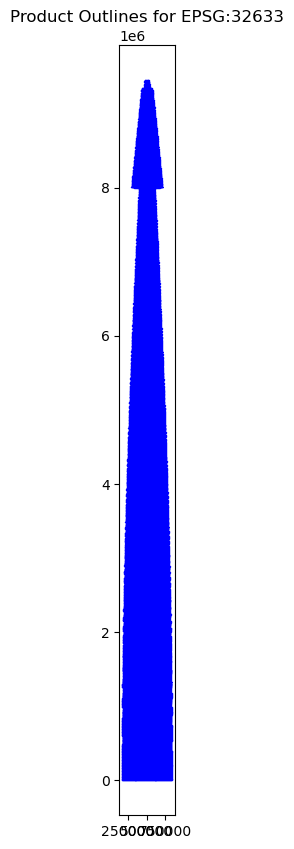

In [12]:
# ## Visualize Product Outlines
# Plot the generated product outlines to visualize.
product_outlines_gdf = gpd.read_file(product_outlines_file)
fig, ax = plt.subplots(figsize=(4, 10))
product_outlines_gdf.plot(ax=ax, edgecolor="blue", facecolor="none")
plt.title(f"Product Outlines for {utm_zone}")
plt.show()

In [13]:
# ## Generate Global Product Outlines Grouped by UTM Zones
# Create global product outlines split by UTM zones.
global_output_folder = os.path.join(output_folder, "global_product_outlines_utm_zones")
grid.generate_global_product_outlines_by_utm(
    output_folder=global_output_folder,
    driver="ESRI Shapefile",
    get_footprints=False,
    naming_convention="zone"
)

print(f"Global product outlines saved to {global_output_folder}")





Global product outlines saved to test_output\global_product_outlines_utm_zones


In [14]:

# ## Merge UTM Zone Files into WGS84
# Merge all the generated UTM zone files into a single WGS84 file.
merged_file = os.path.join(output_folder, "merged_global_outlines.shp")
merge_utm_files_to_wgs84(
    utm_folder=global_output_folder,
    output_file=merged_file,
    driver="ESRI Shapefile"
)

print(f"Merged global outlines saved to {merged_file}")

processing file:  raster_outlines_UTM_zone_10N.shp
processing file:  raster_outlines_UTM_zone_10S.shp
processing file:  raster_outlines_UTM_zone_11N.shp
processing file:  raster_outlines_UTM_zone_11S.shp
processing file:  raster_outlines_UTM_zone_12N.shp
processing file:  raster_outlines_UTM_zone_12S.shp
processing file:  raster_outlines_UTM_zone_13N.shp
processing file:  raster_outlines_UTM_zone_13S.shp
processing file:  raster_outlines_UTM_zone_14N.shp
processing file:  raster_outlines_UTM_zone_14S.shp
processing file:  raster_outlines_UTM_zone_15N.shp
processing file:  raster_outlines_UTM_zone_15S.shp
processing file:  raster_outlines_UTM_zone_16N.shp
processing file:  raster_outlines_UTM_zone_16S.shp
processing file:  raster_outlines_UTM_zone_17N.shp
processing file:  raster_outlines_UTM_zone_17S.shp
processing file:  raster_outlines_UTM_zone_18N.shp
processing file:  raster_outlines_UTM_zone_18S.shp
processing file:  raster_outlines_UTM_zone_19N.shp
processing file:  raster_outlin

KeyboardInterrupt: 

In [ ]:
# ## Visualize Merged Global Outlines
# Load and plot the merged global outlines.
merged_outlines_gdf = gpd.read_file(merged_file)

merged_outlines_gdf.head()


In [ ]:
# Save grid points to a GeoJSON file.
grid_output_file = os.path.join(output_folder, f"grid_{dist}km.shp")
grid_points_export = grid_points[["grid_cell", "geometry"]].copy()
grid_points_export.to_file(grid_output_file, driver="ESRI Shapefile")
print(f"Grid points saved to {grid_output_file}")

In [ ]:
# ## Clean-Up Outputs
# Optionally, clean up generated files.
clean_up = False
if clean_up:
    import shutil
    shutil.rmtree(output_folder)
    print("Cleaned up all generated files.")

# Now, we can similarly work from the metadata parquet files

In [4]:
# provide a folder path to the output folder
# ### Create Output Directory
# Set up directories to save output files.
output_folder = "test_filtered_output"
os.makedirs(output_folder, exist_ok=True)


In [5]:
# ### Initialize Grid
# Create a `Grid` object with a 10 km grid resolution.
dist = 10  # Grid resolution in kilometers
grid = Grid(dist)
print("Grid initialized with resolution:", dist, "km")


Grid initialized with resolution: 10 km


In [16]:
# Get the S2L2A metadata file

metadata_file = "metadata_s2l2.parquet"
metadata = pd.read_parquet(metadata_file)
print("Metadata loaded successfully!")
metadata['timestamp'] = pd.to_datetime(metadata.timestamp)
gdf = gpd.GeoDataFrame(
    metadata, geometry=gpd.points_from_xy(metadata.centre_lon, metadata.centre_lat), crs=metadata.crs.iloc[0]
)

Metadata loaded successfully!


In [12]:
def filter_metadata(df,
                    region=None,
                    daterange=None,
                    cloud_cover=(0,100),
                    nodata=(0, 1.0)
                   ):
    """Filters the Major-TOM dataframe based on several parameters

    Args:
        df (geopandas dataframe): Parent dataframe
        region (shapely geometry object) : Region of interest
        daterange (tuple) : Inclusive range of dates (example format: '2020-01-01')
        cloud_cover (tuple) : Inclusive percentage range (0-100) of cloud cover
        nodata (tuple) : Inclusive fraction (0.0-1.0) of no data allowed in a sample

    Returns:
        df: a filtered dataframe
    """
    # temporal filtering
    if daterange is not None:
        assert (isinstance(daterange, list) or isinstance(daterange, tuple)) and len(daterange)==2
        df = df[df.timestamp >= daterange[0]]
        df = df[df.timestamp <= daterange[1]]
    
    # spatial filtering
    if region is not None:
        idxs = df.sindex.query(region)
        df = df.take(idxs)
    # cloud filtering
    if cloud_cover is not None:
        df = df[df.cloud_cover >= cloud_cover[0]]
        df = df[df.cloud_cover <= cloud_cover[1]]

    # spatial filtering
    if nodata is not None:
        df = df[df.nodata >= nodata[0]]
        df = df[df.nodata <= nodata[1]]

    return df


In [17]:
filtered_df = filter_metadata(gdf,
                              cloud_cover = (0,10), # cloud cover between 0% and 10%
                              region=box(14.011710578,40.7015558593,14.423765416,41.1019258062), # you can try with different bounding boxes, like in the cell above
                              daterange=('2020-01-01', '2025-01-01'), # temporal range
                              nodata=(0.0,0.0) # only 0% of no data allowed
                              )

filtered_df.head()

,grid_cell,grid_row_u,grid_col_r,product_id,timestamp,cloud_cover,nodata,centre_lat,centre_lon,crs,parquet_url,parquet_row,geometry
1591452,453U_119R,453,119,S2A_MSIL2A_20210510T100031_N0500_R122_T33TVF_2...,2021-05-10 10:00:31,0.000000,0.0,40.734109,14.155341,EPSG:32633,https://huggingface.co/datasets/Major-TOM/Core...,33,POINT (14.155 40.734)
1593374,454U_120R,454,120,S2B_MSIL2A_20220719T095559_N0400_R122_T33TVF_2...,2022-07-19 09:55:59,0.000000,0.0,40.823861,14.292709,EPSG:32633,https://huggingface.co/datasets/Major-TOM/Core...,455,POINT (14.293 40.824)
1595266,455U_120R,455,120,S2B_MSIL2A_20220719T095559_N0400_R122_T33TVF_2...,2022-07-19 09:55:59,0.000000,0.0,40.913671,14.311585,EPSG:32633,https://huggingface.co/datasets/Major-TOM/Core...,347,POINT (14.312 40.914)
1595265,455U_119R,455,119,S2A_MSIL2A_20200113T095351_N0500_R079_T33TVF_2...,2020-01-13 09:53:51,0.000000,0.0,40.913731,14.192730,EPSG:32633,https://huggingface.co/datasets/Major-TOM/Core...,346,POINT (14.193 40.914)
1595264,455U_118R,455,118,S2A_MSIL2A_20230318T095031_N0509_R079_T33TVF_2...,2023-03-18 09:50:31,2.408506,0.0,40.913791,14.073875,EPSG:32633,https://huggingface.co/datasets/Major-TOM/Core...,345,POINT (14.074 40.914)


In [19]:
filtered_points = grid.filter_gridpoints_from_metadata(filtered_df)

Found 9 unique grid cells in metadata.
Filtered grid points to 9 matching records.


In [21]:
subset_with_footprints = generate_product_outlines(
    filtered_points, get_footprints=True
)

print("Subset of grid points with footprints:")
print(subset_with_footprints[["grid_cell", "utm_crs", "utm_footprint"]])

Subset of grid points with footprints:
      grid_cell     utm_crs                                      utm_footprint
1638  453U_119R  EPSG:32633  POLYGON ((434017.794305 4504244.40132, 434017....
1637  454U_120R  EPSG:32633  POLYGON ((445697.420125 4514104.878801, 445697...
1633  455U_118R  EPSG:32633  POLYGON ((427349.551347 4524259.936869, 427349...
1634  455U_119R  EPSG:32633  POLYGON ((437358.568485 4524154.14666, 437358....
1635  455U_120R  EPSG:32633  POLYGON ((447367.539888 4524061.936163, 447367...
1631  456U_118R  EPSG:32633  POLYGON ((429020.402583 4534213.513238, 429020...
1632  456U_119R  EPSG:32633  POLYGON ((439029.079893 4534109.665314, 439029...
1629  457U_118R  EPSG:32633  POLYGON ((430691.345607 4544167.511129, 430691...
1631  457U_120R  EPSG:32633  POLYGON ((450707.928244 4543977.390889, 450707...


# Conclusion
### This notebook shows how to get the actual product polygons of the dataset from the grid class without having to download the data, including generating outlines, working with UTM zones, saving files, and retrieving utm footprints.
